# Redes Perceptron

* Utilizada principalmetne na identificação de padrões
* Rede feed-forward
* Treinamento Supervisionado
* Classes devem ser linearmente separáveis

## Modelo de neurônio

<img src="neuronio.jpg" style=width:500px;height:400px/>

## Função de Ativação

<img src="limiar.jpg" style=width:500px;height:400px/>

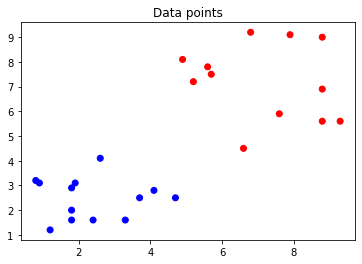

In [67]:
import numpy as np
import matplotlib.pyplot as plt

# Criadno Dataset
x = np.array([[5.7, 7.5], [9.3, 5.6], [8.8, 6.9], [6.8, 9.2], [7.9, 9.1],
              [8.8, 5.6], [5.6, 7.8], [8.8, 9.0], [7.6, 5.9], [4.9, 8.1],
              [6.6, 4.5], [5.2, 7.2], [1.2, 1.2], [2.4, 1.6], [4.7, 2.5],
              [0.9, 3.1], [2.6, 4.1], [1.8, 2.0], [4.1, 2.8], [1.8, 1.6],
              [1.9, 3.1], [0.8, 3.2], [1.8, 2.9], [3.3, 1.6], [3.7, 2.5]
             ])

d = np.array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1])

plt.figure(figsize=(6,4))
plt.title("Data points")
plt.scatter(x[:, 0], x[:, 1], c = d, cmap = 'bwr')
plt.show()

In [114]:
#CRIANDO A CLASSE DA REDE PERCEPTRON
class Perceptron:
    
    def __init__(self, lr, n_epochs):
        # Construtor, define taxa de aprendizado e número máximo de épocas
        self.lr = lr
        self.n_epochs = n_epochs
        
    def activation(self, value):
        # 1 se value > 0, -1 se value < 0, 0 se value == 0 
        return (1 if value > 0 else -1 if value < 0 else 0)
        
    def predict(self, x):
        # Multiplicação matricial entre as entradas e os pesos somado ao bias proporcional
        return np.dot(x, self.weights.T) + self.bias * self.w_bias
    
    def evaluate(self, target, predicted):
        # Calcula a diferença entre o valor real e o valor predito
        return (target - predicted)
    
    def train(self, x, d):
        # Definir aleatoriamente os pesos, o bias e o peso do bias
        # Enquanto houver erro, ou o máximo de épocas não for atingido continua o processo
            
        self.weights = np.random.random(x.shape[1])
        self.bias = np.random.random()
        self.w_bias = np.random.random()
        
        epoch = 0
        is_error = True
        self.total_error = []
        
        while is_error and epoch < self.n_epochs:
            
            is_error  = False
            epoch_errors = 0
            
            # Para cada amostra
            for xi, target in zip(x, d):
                
                predicted = self.predict(xi)
                predicted = self.activation(predicted)
                
                current_error = self.evaluate(target, predicted)
                epoch_errors += current_error
                
                # Se houve erro, atualizar os pesos
                if predicted != target:
                    self.weights += self.lr * current_error * xi
                    self.w_bias += self.lr * current_error * self.bias
                    is_error = True
                    
            self.total_error.append(epoch_errors/len(x))
            epoch += 1
            
    def test(self, x):
        ''' Dado uma lista de X, submete-os à rede'''
        results = []
        for xi in x:
            predict = self.predict(xi)
            predict = self.activation(predict)
            results.append(predict)
            
        return results

In [115]:
# Instanciando e treinando a rede
p = Perceptron(lr = 0.1, n_epochs = 100)
p.train(x = x, d = d)

In [116]:
# Entrando com novos valores para teste
x_teste = np.array([[6, 2], [9, 3], [5, 6], [7, 3], [6, 7], [1, 6]])

teste_resultado = p.test(x_teste)
teste_resultado

[-1, -1, 1, -1, 1, 1]

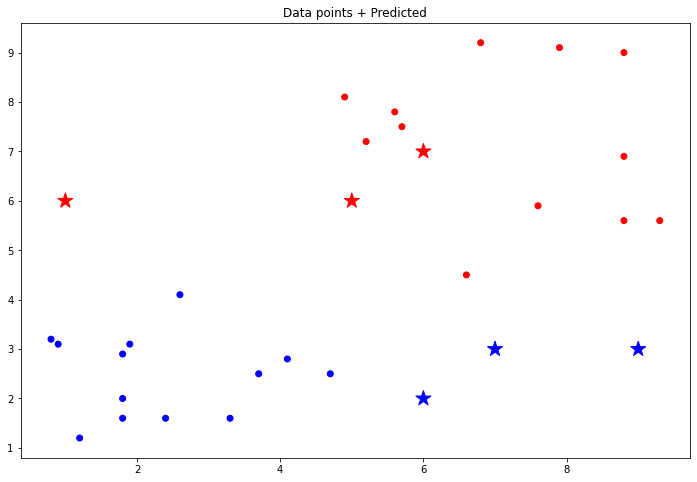

In [117]:
# Mostrando valores preditos
plt.figure(figsize=(12,8))
plt.title("Data points + Predicted")
plt.scatter(x[:, 0], x[:, 1], c = d, cmap = 'bwr')
plt.scatter(x_teste[:, 0], x_teste[:, 1], c = teste_resultado, cmap = 'bwr', marker = "*", s=250)
plt.show()

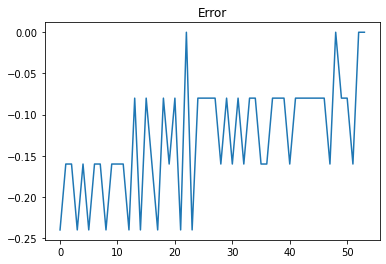

In [118]:
# Mostrando a atualização dos valores de erro 
plt.figure(figsize=(6,4))
plt.title("Error")
plt.plot(p.total_error)
plt.show()

In [119]:
# Mostrando pesos finais
print(p.weights)

[0.03386819 2.01101485]
